<a href="https://colab.research.google.com/github/sohyunwriter/data-cookbook/blob/main/RFM%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RFM 분석
Data
- https://dacon.io/competitions/official/236222/overview/description

Reference    
- https://datarian.io/blog/what-is-rfm
- https://dacon.io/competitions/official/236222/codeshare/9806
- https://dacon.io/competitions/official/236222/codeshare/9808
- https://dacon.io/competitions/official/236222/codeshare/9812

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [52]:
plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['axes.unicode_minus'] =False

In [53]:
pd.set_option('display.max_columns', None)  # 데이터프레임 컬럼 모두 보이게 하기

## 1. Load Data

In [54]:
df_sale = pd.read_csv('/content/drive/MyDrive/data_ecust/Onlinesales_info.csv')
df_cust = pd.read_csv('/content/drive/MyDrive/data_ecust/Customer_info.csv')
df_dis = pd.read_csv('/content/drive/MyDrive/data_ecust/Discount_info.csv')
df_mkt = pd.read_csv('/content/drive/MyDrive/data_ecust/Marketing_info.csv')
df_tax = pd.read_csv('/content/drive/MyDrive/data_ecust/Tax_info.csv')
# df_sale['거래날짜'] = pd.to_datetime(df_sale['거래날짜'])

### Dataset Info.

- Onlinesales_info.csv [파일]    온라인거래와 관련된 정보     
고객ID : 고객 고유 ID    
거래ID : 거래 고유 ID    
거래날짜 : 거래가 이루어진 날짜    
제품ID : 제품 고유 ID    
제품카테고리 : 제품이 포함된 카테고리    
수량 : 주문한 품목 수    
평균금액 : 수량 1개당 가격 (단위 : 달러)    
동일 상품이어도 세부 옵션에 따라 가격이 다를 수 있음    
배송료 : 배송비용 (단위 : 달러)   
쿠폰상태 : 할인쿠폰 적용 상태    

- Customer_info.csv [파일] 고객과 관련된 정보     
고객ID : 고객 고유 ID    
성별 : 고객 성별       
고객지역 : 고객지역    
가입기간 : 가입기간 (단위 : 월)    

- Discount_info.csv [파일] 할인과 관련된 정보   
월 : 월(Month) 정보   
제품카테고리 : 제품이 포함된 카테고리    
쿠폰코드 : 쿠폰코드   
할인율 : 해당 쿠폰에 대한 할인율(%)   

- Marketing_info.csv [파일] 마케팅비용과 관련된 정보    
날짜 : 마케팅이 이루어진 날짜    
오프라인비용 : 오프라인 마케팅으로 지출한 비용 (단위 : 달러)    
온라인비용 : 온라인 마케팅으로 지출한 비용 (단위 : 달러)    

- Tax_info.csv [파일] 세금과 관련된 정보    
제품 카테고리 : 제품이 포함된 카테고리    
GST : Goods and Services Tax(%)   


※ 제공드리는 데이터를 엑셀로 열람하는 경우, 데이터가 비정상적으로 보이는 현상이 발생할 수 있으니 반드시 Pandas패키지와 같은 데이터툴을 이용하여 열람부탁드립니다.

## 2. Data 파악 및 Merge

In [6]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [7]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [8]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [9]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [10]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


### 1.결측치 존재 여부 확인 -> 모두 결측치 없음

In [55]:
# 결측치 확인
print(f"<고객 데이터>\n{df_cust.isnull().sum()}\n")
print(f"<할인 데이터>\n{df_dis.isnull().sum()}\n")
print(f"<마케팅 데이터>\n{df_mkt.isnull().sum()}\n")
print(f"<온라인 판매 데이터>\n{df_sale.isnull().sum()}\n")
print(f"<세금 데이터>\n{df_tax.isnull().sum()}\n")

<고객 데이터>
고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64

<할인 데이터>
월         0
제품카테고리    0
쿠폰코드      0
할인율       0
dtype: int64

<마케팅 데이터>
날짜        0
오프라인비용    0
온라인비용     0
dtype: int64

<온라인 판매 데이터>
고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
dtype: int64

<세금 데이터>
제품카테고리    0
GST       0
dtype: int64



In [56]:
# 크기 확인
print(df_cust.shape)
print(df_dis.shape)
print(df_mkt.shape)
print(df_sale.shape)
print(df_tax.shape)

(1468, 4)
(204, 4)
(365, 3)
(52924, 9)
(20, 2)


In [57]:
df_sale.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [58]:
df_cust.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


### 2.1.월 컬럼 전처리 (Jan -> 1, ...)

In [59]:
df_dis.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [60]:
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_dis['월'] = df_dis['월'].map(month_mapping)

In [61]:
df_dis.head()

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20


### 2.2.거래날짜 전처리

In [62]:
df_sale['거래날짜'] = pd.to_datetime(df_sale['거래날짜'])
df_sale['월'] = df_sale['거래날짜'].dt.month

In [63]:
df_sale.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1


### 3.(MERGE) Onlinesales_info, Customer_info 병합

In [64]:
df_sale.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1


In [65]:
df_cust.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [66]:
df_cust.shape[0], len(df_cust['고객ID'].unique())  # 고객ID에 중복 없음

(1468, 1468)

In [67]:
# Onlinesales_info와 Customer_info를 고객ID를 기준으로 조인
df = pd.merge(df_sale, df_cust, on='고객ID', how='left')

In [68]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,남,Chicago,12


In [69]:
df.shape  # merge 후 건수 늘어나지 않았음 확인

(52924, 13)

### 4.1.discount -> PK는 (월, 제품카테고리)

In [70]:
df_dis.head()

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20


In [71]:
df_dis.shape

(204, 4)

In [72]:
group = df_dis.groupby(['월', '제품카테고리']).count()

In [73]:
group = group.reset_index()

In [74]:
group['쿠폰코드'].max()

1

### 4.2.(MERGE) df, Discount_info 병합

In [75]:
# df와 Discount_info를 월, 제품카테고리를 기준으로 조인
df = pd.merge(df, df_dis, on=['월', '제품카테고리'], how='left')

In [76]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,남,Chicago,12,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,남,Chicago,12,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,남,Chicago,12,AIO10,10.0


### 5.1.Tax_info -> PK는 (제품카테고리)

In [77]:
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [78]:
df_tax.shape[0], len(df_tax['제품카테고리'].unique())

(20, 20)

### 5.2.(MERGE) df, Tax_info 병합

In [79]:
# 위 결과와 tax를 제품카테고리를 기준으로 조인
df = pd.merge(df, df_tax, on='제품카테고리', how='left')

In [80]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,남,Chicago,12,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,남,Chicago,12,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,남,Chicago,12,AIO10,10.0,0.18


### 6.결측치 확인 및 전처리 -> 쿠폰코드, 할인율 컬럼에 결측 존재 ('unknown', 0으로 전처리)

In [81]:
df.isnull().sum()

,0
고객ID,0
거래ID,0
거래날짜,0
제품ID,0
제품카테고리,0
수량,0
평균금액,0
배송료,0
쿠폰상태,0
월,0


In [82]:
# 쿠폰코드의 결측치는 'unknown'으로, 할인율의 결측치는 0으로 채우기
df['쿠폰코드'].fillna('unknown', inplace=True)
df['할인율'].fillna(0, inplace=True)

### 7.전체금액, 전체금액_VAT포함, 지불금액 컬럼 생성

In [85]:
df['쿠폰상태'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [86]:
df['쿠폰사용여부'] = df['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)

In [87]:
# 전체금액 = (수량 * 평균금액)
# 전체금액_VAT포함 = (수량 * 평균금액) * (1 + tax)
# 지불금액 = (수량 * 평균금액) * (1 - 할인율*쿠폰사용여부 / 100) * (1 + tax)

df['전체금액'] = (df['수량'] * df['평균금액'])
df['전체금액_VAT포함'] = (df['수량'] * df['평균금액']) * (1 + df['GST'])
df['지불금액'] = (df['수량'] * df['평균금액']) * (1 + df['GST']) * (1 - (df['할인율'] * df['쿠폰사용여부'] / 100))

In [88]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율,GST,쿠폰사용여부,전체금액,전체금액_VAT포함,지불금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10,1,153.71,169.081,152.1729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,남,Chicago,12,OFF10,10.0,0.10,1,2.05,2.255,2.0295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,남,Chicago,12,SALE10,10.0,0.18,0,87.65,103.427,103.4270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,남,Chicago,12,AIO10,10.0,0.18,1,16.50,19.470,17.5230


## 3. RFM 분석

RFM 분석: 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포 확인하거나 사용자 그룹(또는 등급)을 나누어 분석

- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가



In [83]:
df_mkt.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [84]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,성별,고객지역,가입기간,쿠폰코드,할인율,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,남,Chicago,12,ELEC10,10.0,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,남,Chicago,12,OFF10,10.0,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,남,Chicago,12,SALE10,10.0,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,남,Chicago,12,AIO10,10.0,0.18


### RFM_DF 생성

In [163]:
# 데이터의 마지막날 +1일을 기준으로 잡음
last = df['거래날짜'].max() + pd.DateOffset(days=1)  # 2019-12-31 + 1일 = 2020-01-01

rfm_df = df.groupby(['고객ID']).agg({
    '거래날짜': lambda x: (last - x.max()).days,
    '거래ID': lambda x: x.nunique(),
    '지불금액': 'sum'
    })

rfm_df.rename(columns={'거래날짜': 'Recency',
                         '거래ID': 'Frequency',
                         '지불금액': 'Monetary'}, inplace=True)

rfm_df.head()

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,108,1,24.98174
USER_0001,60,31,15021.70396
USER_0002,74,8,1492.40594
USER_0003,18,11,1339.55528
USER_0004,108,13,1369.93900


In [91]:
rfm_df.shape

(1468, 3)

### Recency, Frequency, Monetary 고객 분포 시각화

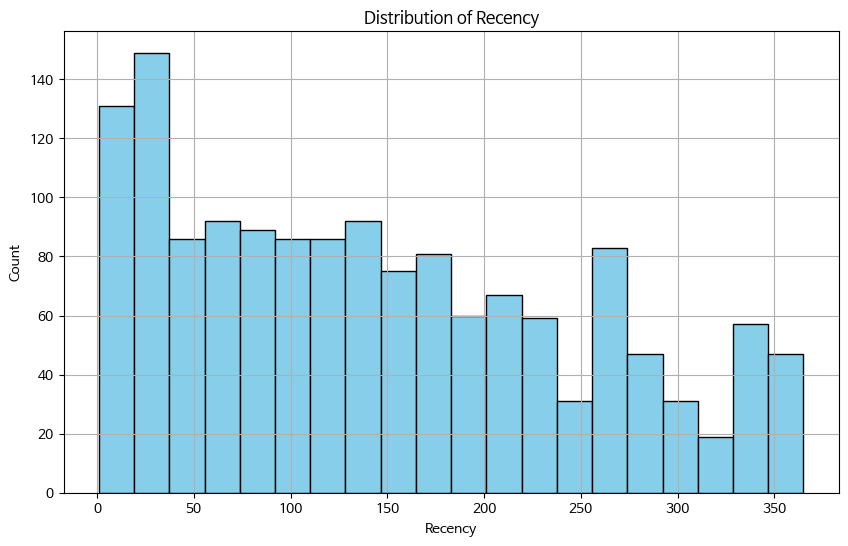

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

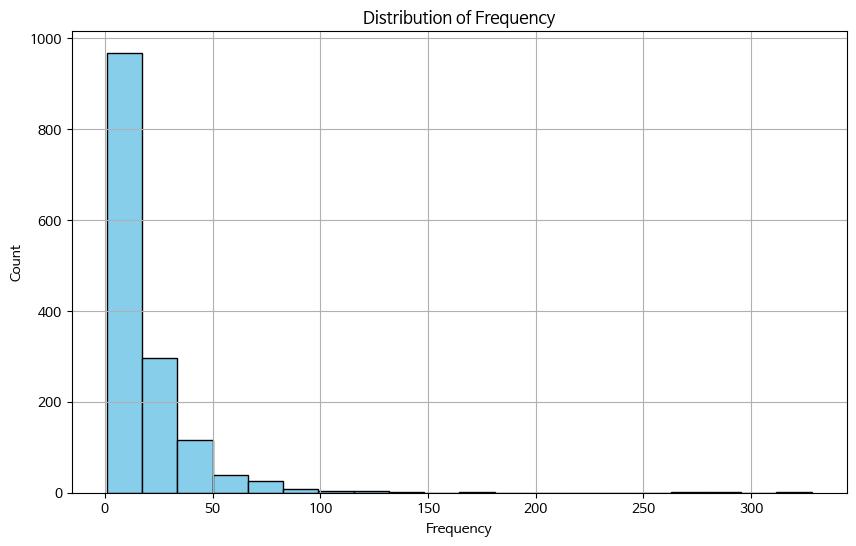

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['Frequency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

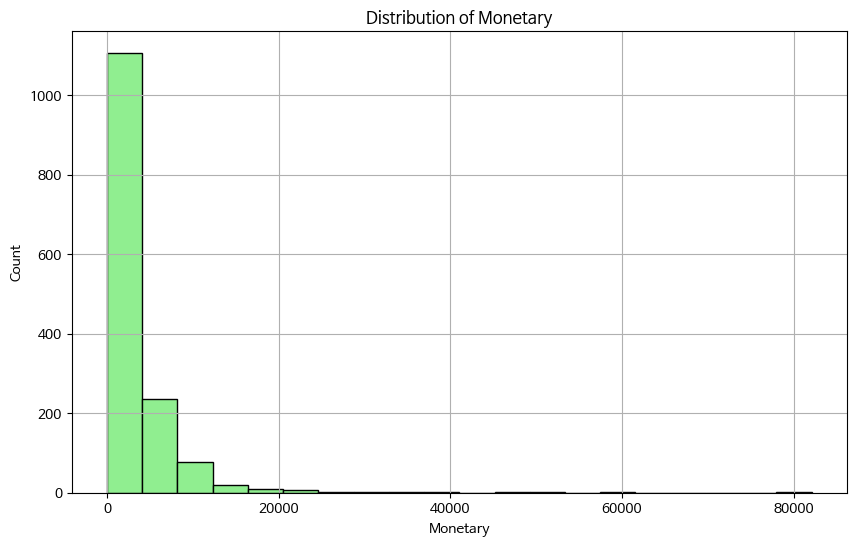

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['Monetary'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.grid(True)
plt.show()

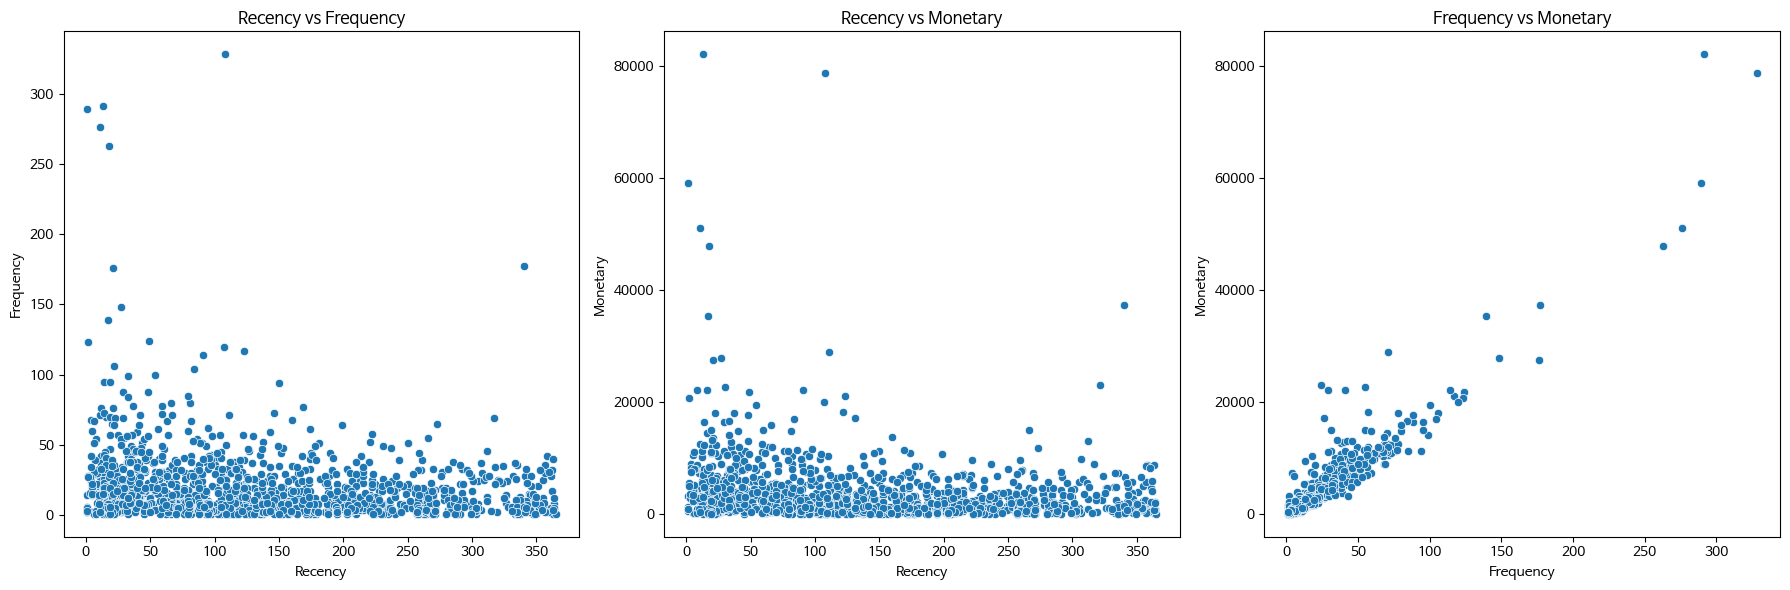

In [109]:
# 건수 많을 때는 전체 데이터셋으로 scatterplot 그리는 것 지양

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency')
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary')
plt.title('Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

### 1.Recency 등급화

In [164]:
# Recency를 6단계로 구분하여 'R' 컬럼에 저장  -> 왜 6단계로 구분하는가? 또, 왜 50, 100, 150, 200, 300으로 구분하는가?

# (비즈니스 로직) 1개월, 2개월, 3개월, 6개월, 1년 경험 여부로 보통 비즈니스 마케팅하므로 이와 같이 등급화했음
def assign_R(recency):
    if recency <= 30:    # 최근 1개월
        return 5
    elif recency <= 60:   # 최근 2개월
        return 4
    elif recency <= 90:   # 최근 3개월
        return 3
    elif recency <= 180:  # 최근 6개월
        return 2
    elif recency <= 365:  # 최근 1년
        return 1
    else:
        return 0

rfm_df['R'] = rfm_df['Recency'].apply(assign_R)

In [165]:
rfm_df.head()

,Recency,Frequency,Monetary,R
고객ID,,,,
USER_0000,108,1,24.98174,2
USER_0001,60,31,15021.70396,4
USER_0002,74,8,1492.40594,3
USER_0003,18,11,1339.55528,5
USER_0004,108,13,1369.93900,2


In [166]:
rfm_df.groupby('R').count()

,Recency,Frequency,Monetary
R,,,
1,503,503,503
2,422,422,422
3,151,151,151
4,161,161,161
5,231,231,231


In [167]:
rfm_df.groupby('R').mean()

,Recency,Frequency,Monetary
R,,,
1,265.441352,12.326044,2162.597339
2,135.518957,16.215640,2756.739568
3,75.821192,19.456954,3480.394838
4,44.136646,26.254658,5101.303014
5,17.437229,27.805195,5379.842905


### 2.Frequency 등급화

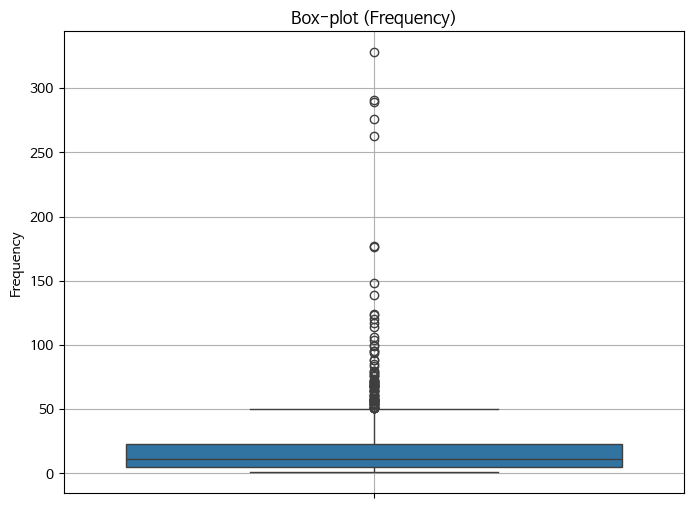

In [168]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=rfm_df['Frequency'])
plt.title('Box-plot (Frequency)')
plt.grid(True)
plt.show()

In [169]:
rfm_df[rfm_df['Frequency'] >= 50].shape

(90, 4)

In [170]:
rfm_df['Frequency'].min(), rfm_df['Frequency'].max(), rfm_df['Frequency'].mean(), rfm_df['Frequency'].median()

(1, 328, np.float64(18.141008174386922), 11.0)

In [171]:
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: 50 if x >= 50 else x)

In [172]:
def create_bins(series, method='quantile', bins=10, labels=None):
    """
    연속형 컬럼 binning 함수

    Parameters:
        series : pd.Series (연속형 데이터)
        method : 'quantile' (분위수) or 'uniform' (균등)
        bins : 구간 수
        labels : 구간 이름 리스트 (default None -> 자동 생성)

    Returns:
        pd.Series : binning된 구간
    """
    if method == 'quantile':
        binned = pd.qcut(series, q=bins, labels=labels, duplicates='drop')
    elif method == 'uniform':
        binned = pd.cut(series, bins=bins, labels=labels)
    else:
        raise ValueError("method는 'quantile' 또는 'uniform'만 가능합니다.")

    return binned

In [173]:
create_bins(rfm_df['F'], method='quantile', bins=5).value_counts().sort_index()

,count
F,
"(0.999, 4.0]",329
"(4.0, 8.0]",291
"(8.0, 15.0]",288
"(15.0, 28.0]",281
"(28.0, 50.0]",279


In [174]:
create_bins(rfm_df['F'], method='uniform', bins=5).value_counts().sort_index()

,count
F,
"(0.951, 10.8]",722
"(10.8, 20.6]",320
"(20.6, 30.4]",175
"(30.4, 40.2]",113
"(40.2, 50.0]",138


In [175]:
rfm_df['F'] = create_bins(rfm_df['F'], method='quantile', bins=5, labels=[1, 2, 3, 4, 5])

In [176]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F
고객ID,,,,,
USER_0000,108,1,24.98174,2,1
USER_0001,60,31,15021.70396,4,5
USER_0002,74,8,1492.40594,3,2
USER_0003,18,11,1339.55528,5,3
USER_0004,108,13,1369.93900,2,3


### 3.Monetary 등급화

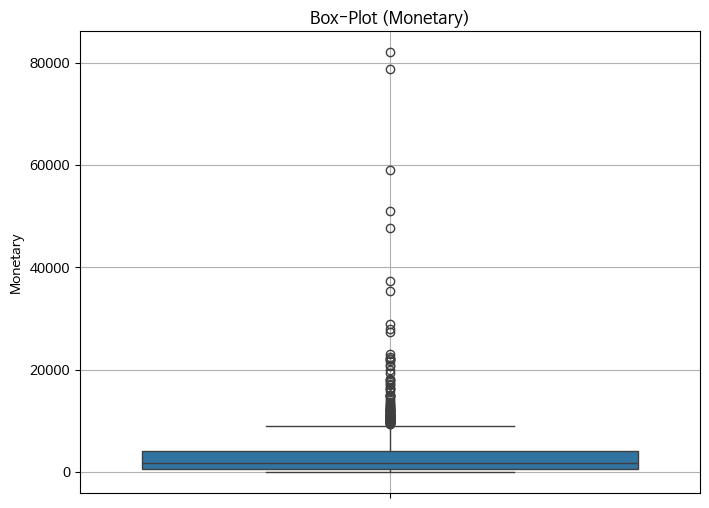

In [178]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=rfm_df['Monetary'])
plt.title('Box-Plot (Monetary)')
plt.grid(True)
plt.show()

In [179]:
create_bins(rfm_df['Monetary'], method='quantile', bins=5).value_counts().sort_index()

,count
Monetary,
"(0.989, 516.994]",294
"(516.994, 1265.552]",293
"(1265.552, 2475.859]",294
"(2475.859, 4837.059]",293
"(4837.059, 82073.783]",294


In [180]:
rfm_df['M'] = create_bins(rfm_df['Monetary'], method='quantile', bins=5, labels=[1, 2, 3, 4, 5])

In [181]:
rfm_df['F'] = rfm_df['F'].astype('int')
rfm_df['M'] = rfm_df['M'].astype('int')

### 4.RFM 스코어 생성

In [182]:
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

print(rfm_df)

           Recency  Frequency     Monetary  R  F  M  RFM_Score
고객ID                                                          
USER_0000      108          1     24.98174  2  1  1          4
USER_0001       60         31  15021.70396  4  5  5         14
USER_0002       74          8   1492.40594  3  2  3          8
USER_0003       18         11   1339.55528  5  3  3         11
USER_0004      108         13   1369.93900  2  3  3          8
...            ...        ...          ... .. .. ..        ...
USER_1463      271          3    582.35600  1  1  2          4
USER_1464       88         19   2384.12372  3  4  3         10
USER_1465      195          2    115.40750  1  1  1          3
USER_1466       70          1    327.80000  3  1  1          5
USER_1467       83         53   6639.11141  3  5  5         13

[1468 rows x 7 columns]


In [183]:
rfm_df.groupby(['RFM_Score'])[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
3,269.310345,1.827586,165.519675
4,184.535714,2.871429,335.432470
5,211.393443,5.180328,740.580799
6,170.363636,6.322314,1020.582095
7,167.277027,8.709459,1357.415635
8,137.171171,10.585586,1842.460981
9,150.474453,15.284672,2490.126146
10,122.913043,18.269565,3293.723988
11,135.296875,27.085938,4980.184274


### 5.RFM 기반 고객 분류

In [184]:
def classify_customer(row):
    r, f, m = row['R'], row['F'], row['M']

     # VIP
    if r >= 5 and f >= 5 and m >= 5:
        return 'VIP'
    # VIP이탈고객: Recency 점수가 3 이하이며, 나머지 점수가 4 이상
    elif r <= 3 and (f >= 4 and m >= 4):
        return 'VIP이탈고객'
    elif f >= 4 and r >= 4 and m >= 4:
        return '충성고객'
    elif f >= 3 and r >= 3 and m >= 3:
        return '충성예정고객'
    elif r <= 2 and f >= 3:
        return '충성이탈예정고객'
    else:
        return '일반고객'  # 이외의 경우를 위한 기본값

rfm_df['고객등급'] = rfm_df.apply(classify_customer, axis=1)


In [185]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,고객등급
고객ID,,,,,,,,
USER_0000,108,1,24.98174,2,1,1,4,일반고객
USER_0001,60,31,15021.70396,4,5,5,14,충성고객
USER_0002,74,8,1492.40594,3,2,3,8,일반고객
USER_0003,18,11,1339.55528,5,3,3,11,충성예정고객
USER_0004,108,13,1369.93900,2,3,3,8,충성이탈예정고객


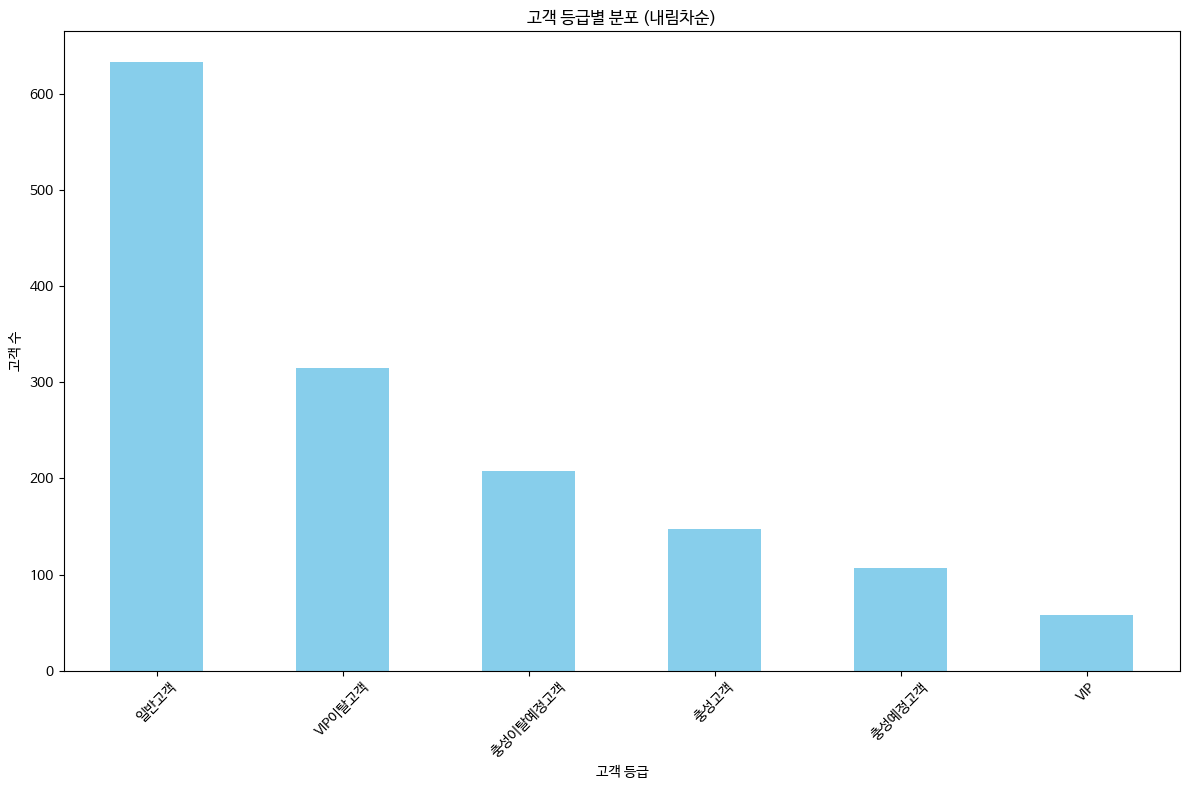

In [186]:
import matplotlib.pyplot as plt

customer_grade_counts_desc = rfm_df['고객등급'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
customer_grade_counts_desc.plot(kind='bar', color='skyblue')
plt.title('고객 등급별 분포 (내림차순)')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()